# `20201108a` -- Experimenting with v0.2.6 of the lib 

#### Changes :

* Saving NDT acquisitions as in `fpga.stdNDTacq()`
* Processing those in `plot.readfile("20201107155232.npz")`

In [1]:
import un0usb as USB # neeeds `pip3 install un0usb` before
import datetime
USB.__version__
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import datetime

from scipy.signal import butter, lfilter, freqz 

from alaw import alaw_compress as ALAW

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
plot = USB.FView()
data = np.load("piezo1/20201108164611.npz") 

-1.0 0.998046875 16384


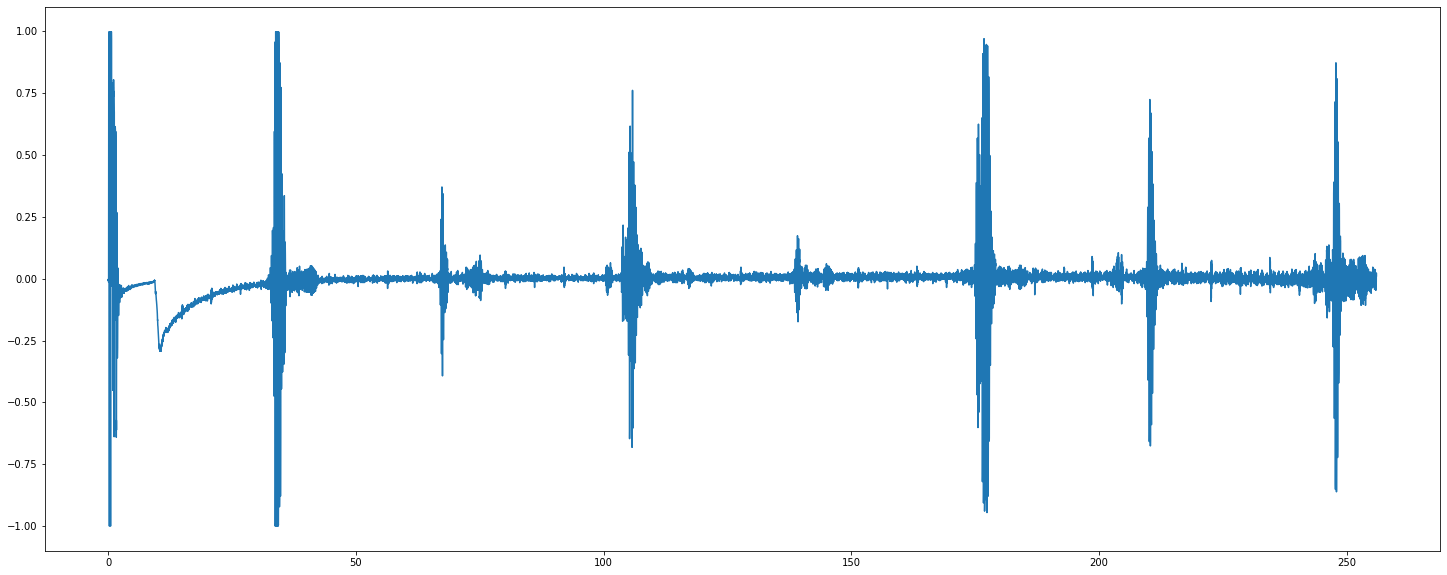

In [3]:
plt.figure(figsize=(25,10))
signal = [x for x in data["signal"][0] ]
plt.plot(data["t"],signal)
print(min(signal),max(signal),len(signal))

In [65]:
F = 2.5E6
sine = [np.sin(2*np.pi*t*F/(1E6)) for t in data["t"]]
cose = [np.cos(2*np.pi*t*F/(1E6)) for t in data["t"]]

(48.0, 64.0)

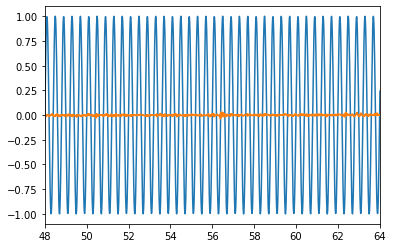

In [66]:
plt.plot(data["t"],sine)
plt.plot(data["t"],signal)
plt.xlim(120*1E6/F, 160*1E6/F)

In [67]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [71]:
X = [sine[x] * signal[x] for x in range(len(signal))]
Y = [sine[x] * signal[x] for x in range(len(signal))]

cutoff = 2
X_low = butter_lowpass_filter(X, cutoff, 64.0)
Y_low = butter_lowpass_filter(Y, cutoff, 64.0)

Amplitude = 2* np.sqrt(X_low**2 + Y_low**2)

(30.0, 40.0)

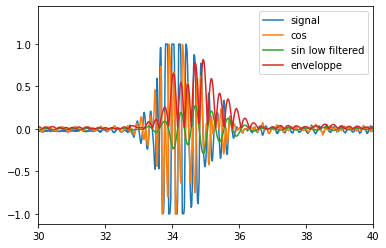

In [72]:
plt.plot(data["t"],signal,label="signal")
plt.plot(data["t"],Y,label="cos")
plt.plot(data["t"],Y_low,label="sin low filtered")
plt.plot(data["t"],Amplitude,label="enveloppe")
plt.legend()
plt.xlim(30, 40)

(175.0, 210.0)

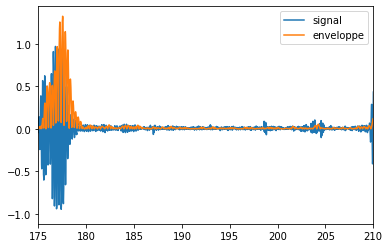

In [73]:
plt.plot(data["t"],signal,label="signal") 
plt.plot(data["t"],Amplitude,label="enveloppe")
plt.legend() 
plt.xlim(175, 210)